Model_Building TEAM_ID - PNT2022TMID

Import necessary package

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Data pre processing

In [4]:
y_train[0]

5

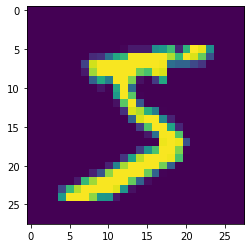

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

Compiling the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [9]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2070 - accuracy: 0.9535 - val_loss: 0.0913 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0813 - val_accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0798 - val_accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0977 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.1333 - val_accuracy: 0.9751


Test the model

In [11]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.133256733417511, 0.9750999808311462]


In [12]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 101ms/step
[[1.87495613e-16 5.53037408e-21 9.00634039e-16 1.65256166e-12
  8.75302693e-22 9.09022702e-21 3.12809211e-29 1.00000000e+00
  8.97999343e-16 3.61112710e-14]
 [6.69515008e-13 2.96964817e-08 1.00000000e+00 3.62569965e-16
  1.91184937e-23 4.69284278e-17 5.60330081e-12 2.00802140e-25
  5.77380765e-12 1.50978193e-21]
 [1.10146330e-10 9.99932528e-01 2.18278401e-05 2.48552183e-13
  1.55416456e-06 7.51825802e-09 5.04072201e-11 4.61151645e-10
  4.41333723e-05 9.91278050e-14]
 [1.00000000e+00 1.23423213e-23 2.96546743e-14 3.83511886e-22
  6.04785958e-17 1.36117558e-13 1.85390887e-11 1.01290116e-20
  1.77254826e-15 4.58761718e-12]]


In [13]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
